In [1]:
import numpy as np 
import pandas as pd
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
import seaborn as sns
import string

import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

In [2]:
path = Path.cwd()/ 'DisneylandReviews.csv'

In [3]:
print(path)

/Users/amandaleonarto/Documents/Personal Project/DisneylandReviews.csv


In [4]:
disney_df = pd.read_csv(path, encoding= 'latin-1', header =[0], skipinitialspace= True, 
                        index_col= 0, na_values = ['missing']) 
#Importing the dataset, and reporting any missing values with 'missing'

# Cleaning the Data and Sorting

In [5]:
print(disney_df.isna().sum()) #Counting the number of missing values. 

Rating                  0
Year_Month           2613
Reviewer_Location       0
Review_Text             0
Branch                  0
dtype: int64


In [6]:
disney_df.dropna(inplace = True) #Dropping the missing values 

In [7]:
# new data frame with split value columns 
new = disney_df["Year_Month"].str.split("-", n = 1, expand = True) 
  
# making separate year column from new data frame 
disney_df["year"]= new[0] 
  
# making separate mounth column from new data frame 
disney_df["month"]= new[1] 
  
# Dropping old feature  
disney_df.drop(columns =["Year_Month"], inplace = True) 

In [8]:
disney_df['month']= disney_df['month'].astype('int64') #We make sure storing the month column as an integer. 
disney_df['quarter']=disney_df['month'].apply(lambda x:1 if x<=3 
                                    else (2 if 3<x<=6 
                                    else (3 if 6<x<=9 
                                    else (4 if 9<x<=12 else x))))

In [9]:
disney_df.head() #Showing the first 5 rows. 

,Rating,Reviewer_Location,Review_Text,Branch,year,month,quarter
Review_ID,,,,,,,
670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,2
670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,2
670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,2
670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,2
670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,2


In [10]:
disney_df['Branch'].value_counts()

Branch
Disneyland_California    18202
Disneyland_Paris         12694
Disneyland_HongKong       9147
Name: count, dtype: int64

In [13]:
disney_df['Reviewer_Location'].value_counts()

Reviewer_Location
United States               13522
United Kingdom               9115
Australia                    4412
Canada                       2116
India                        1470
                            ...  
Turks and Caicos Islands        1
Timor-Leste                     1
South Sudan                     1
Curaçao                         1
Andorra                         1
Name: count, Length: 162, dtype: int64

# Visualizing

### Visualizing Disney Branch

/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

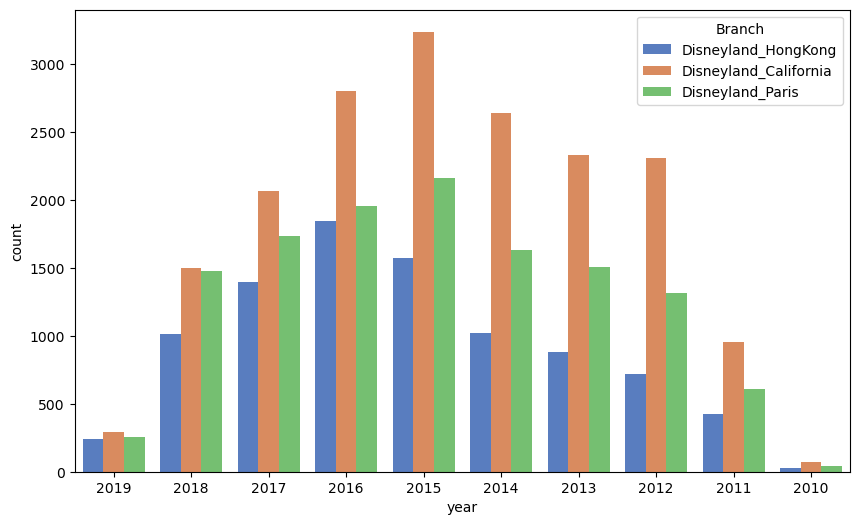

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data= disney_df,x='year',hue='Branch',palette= 'muted');

### Visualizing Yearly Rating

/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

<Axes: xlabel='year', ylabel='count'>

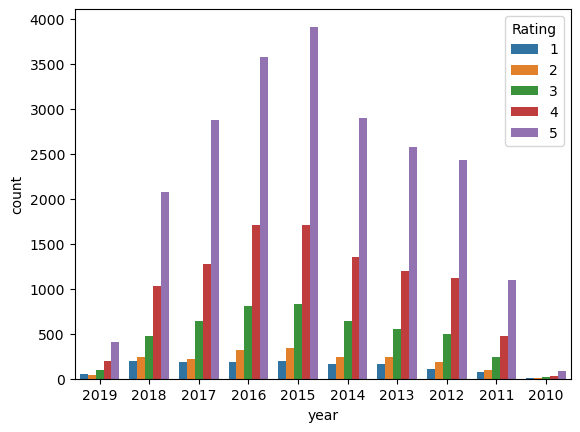

In [23]:
sns.countplot(data= disney_df, x= 'year', hue = 'Rating')

### Visualizing Monthly Rating 

/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amandaleonarto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

<Axes: xlabel='month', ylabel='count'>

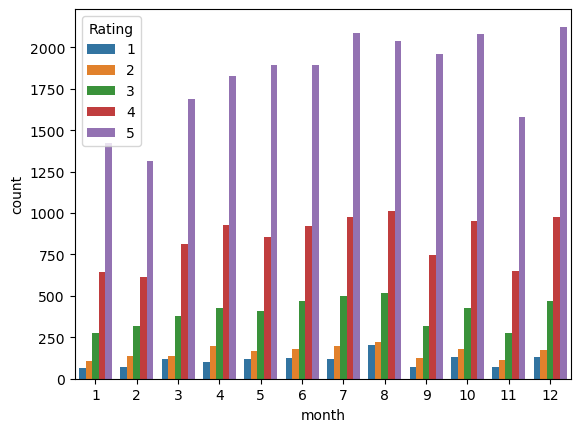

In [12]:
sns.countplot(data= disney_df, x= 'month', hue = 'Rating')

# Sentimental Analysis

### Generating WordCloud (General)

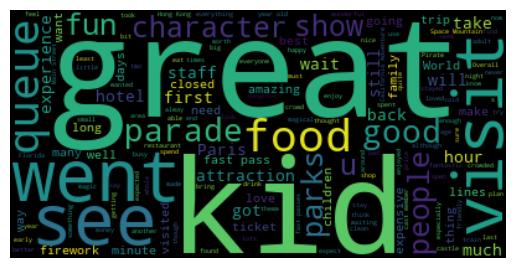

In [14]:
# Filter out stopwords 
#nltk.download('stopwords')
filter_SW = set(STOPWORDS)
filter_SW.update(['park', 'Disney', 'lot', 'Disneyland', 'ride', 'rides','go', 
                  'one','day','time','line','really', 'place', 'even'])

#Concatenate the review text
txt = ' '.join(disney_df['Review_Text'].fillna(''))

#Making the wordcloud function
wordcloud = WordCloud(stopwords = filter_SW).generate(txt)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

### Prepprocessing the Review_Text

In [15]:
#Removing punctuation function
def remove_punc(text):
    clean = ''.join([char for char in text if char not in string.punctuation])
    return clean

#Applying the function.
disney_df['Review_Text'] = disney_df['Review_Text'].apply(remove_punc)

#Checking. 
print(disney_df["Review_Text"].iloc[0])

If youve ever been to Disneyland anywhere youll find Disneyland Hong Kong very similar in the layout when you walk into main street It has a very familiar feel One of the rides  its a Small World  is absolutely fabulous and worth doing The day we visited was fairly hot and relatively busy but the queues moved fairly well 


In [16]:
#Remove digits. 
def remove_digit(text):
    clean = ''.join([i for i in text if not i.isdigit()])
    clean = clean.replace('  ', ' ')
    return clean

#Applying the function.
disney_df['Review_Text'] = disney_df['Review_Text'].apply(remove_digit)


In [17]:
#nltk.download('punkt')
#nltk.download('wordnet')
#Create preprocess text function, Refer to https://www.datacamp.com/tutorial/text-analytics-beginners-nltk
def prepprocess_text(text):
    
    #Tokenize the text
    #Note: tokenize = substitute a randomly generated identifier for 
    #(a sensitive piece of data) in order to prevent unauthorized access.
    tokens = word_tokenize(text.lower())
    
    #Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    #Lemmatize = sort words by grouping inflected or variant forms of the same word.
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    #Join the tokens back into a string
    processed_text= ' '.join(lemmatized_tokens)
    
    return processed_text

disney_df['Review_Text'] = disney_df['Review_Text'].apply(prepprocess_text)

In [18]:
print(disney_df["Review_Text"].iloc[0])

youve ever disneyland anywhere youll find disneyland hong kong similar layout walk main street familiar feel one ride small world absolutely fabulous worth day visited fairly hot relatively busy queue moved fairly well


In [19]:
#Sentiment Analysis Part 
#The function will then check whether the positive score is greater than 0 and returns a sentiment score of 1 
#if it is, and a 0 otherwise. This means that any text with a positive score will be classified 
#as having a positive sentiment, and any text with a non-positive score will be classified as having a negative 
#sentiment.

#nltk.download('vader_lexicon')

Sent_Analyzer = SentimentIntensityAnalyzer()

#Create a get_sentiment function

def get_sentiment(text):
    scores = Sent_Analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0 
    return sentiment

disney_df['sentiment'] = disney_df['Review_Text'].apply(get_sentiment)

In [20]:
print(disney_df.head()) #Just to check if the sentiment work or not

           Rating     Reviewer_Location  \
Review_ID                                 
670772142       4             Australia   
670682799       4           Philippines   
670623270       4  United Arab Emirates   
670607911       4             Australia   
670607296       4        United Kingdom   

                                                 Review_Text  \
Review_ID                                                      
670772142  youve ever disneyland anywhere youll find disn...   
670682799  since last time visit hk disneyland yet time s...   
670623270  thanks god hot humid visiting park otherwise w...   
670607911  hk disneyland great compact park unfortunately...   
670607296  location city took around hour kowlon kid like...   

                        Branch  year  month  quarter  sentiment  
Review_ID                                                        
670772142  Disneyland_HongKong  2019      4        2          1  
670682799  Disneyland_HongKong  2019      5        

In [21]:
#nltk.download('averaged_perceptron_tagger')

#Function to get the adjectives.
def get_adjectives(text): 
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "JJ"]

disney_df['adjectives'] = disney_df['Review_Text'].apply(get_adjectives)

In [22]:
print(disney_df.head()) #Checking 

           Rating     Reviewer_Location  \
Review_ID                                 
670772142       4             Australia   
670682799       4           Philippines   
670623270       4  United Arab Emirates   
670607911       4             Australia   
670607296       4        United Kingdom   

                                                 Review_Text  \
Review_ID                                                      
670772142  youve ever disneyland anywhere youll find disn...   
670682799  since last time visit hk disneyland yet time s...   
670623270  thanks god hot humid visiting park otherwise w...   
670607911  hk disneyland great compact park unfortunately...   
670607296  location city took around hour kowlon kid like...   

                        Branch  year  month  quarter  sentiment  \
Review_ID                                                         
670772142  Disneyland_HongKong  2019      4        2          1   
670682799  Disneyland_HongKong  2019      5     

# WordClouds! Getting Adjectives From Each Rating!

## Rating = 1

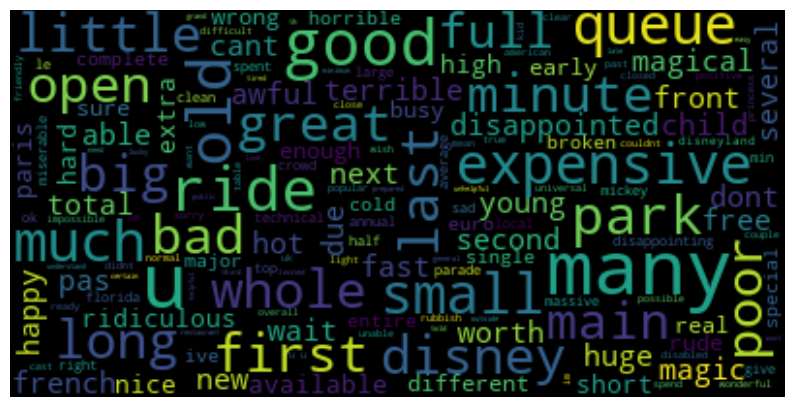

In [23]:
rating_one = disney_df[disney_df['Rating']== 1]
adj_one = ' '.join(rating_one['adjectives'].apply(lambda adjs: ' '.join(adjs)))

plt.figure(figsize=(10,10))
wordcloud_1 = WordCloud(max_font_size = 40, max_words = 1000).generate(adj_one)
plt.axis("off")
plt.imshow(wordcloud_1 , interpolation = 'bilinear')

## Rating = 2

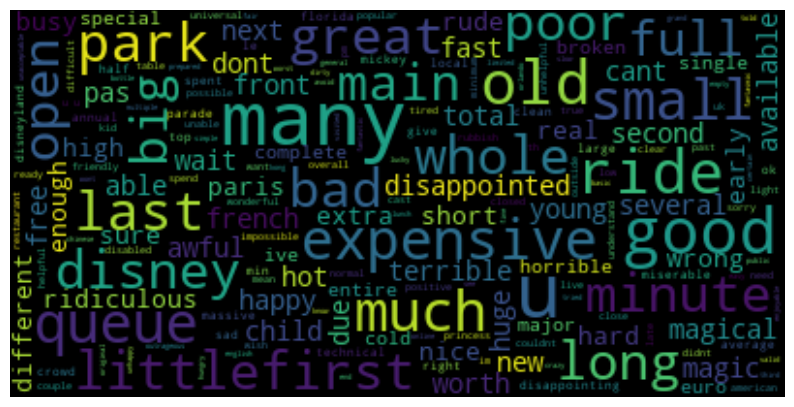

In [24]:
rating_two = disney_df[disney_df['Rating']== 2]
adj_two = ' '.join(rating_one['adjectives'].apply(lambda adjs: ' '.join(adjs)))

plt.figure(figsize=(10,10))
wordcloud_2 = WordCloud(max_font_size = 40, max_words = 1000).generate(adj_two)
plt.axis("off")
plt.imshow(wordcloud_2 , interpolation = 'bilinear')

## Rating = 3

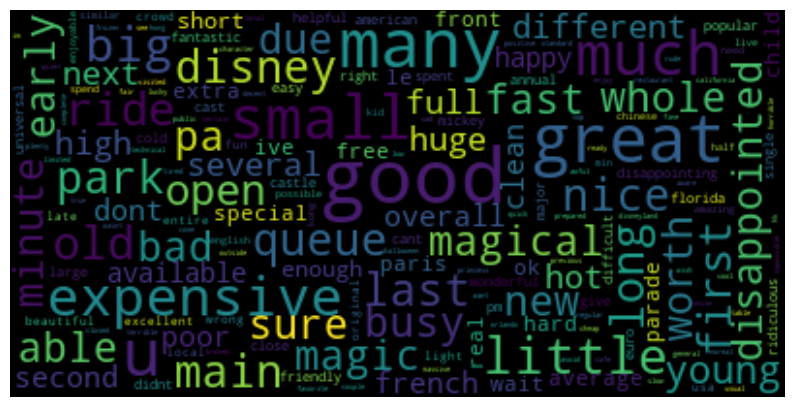

In [25]:
rating_three = disney_df[disney_df['Rating']== 3]
adj_three = ' '.join(rating_three['adjectives'].apply(lambda adjs: ' '.join(adjs)))

plt.figure(figsize=(10,10))
wordcloud_3 = WordCloud(max_font_size = 40, max_words = 1000).generate(adj_three)
plt.axis("off")
plt.imshow(wordcloud_3 , interpolation = 'bilinear')

## Rating = 4

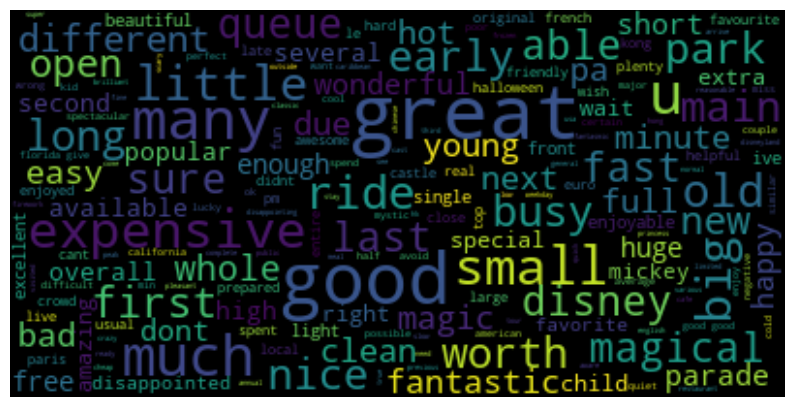

In [26]:
rating_four = disney_df[disney_df['Rating']== 4]
adj_four = ' '.join(rating_four['adjectives'].apply(lambda adjs: ' '.join(adjs)))

plt.figure(figsize=(10,10))
wordcloud_4 = WordCloud(max_font_size = 40, max_words = 1000).generate(adj_four)
plt.axis("off")
plt.imshow(wordcloud_4 , interpolation = 'bilinear')

## Rating = 5

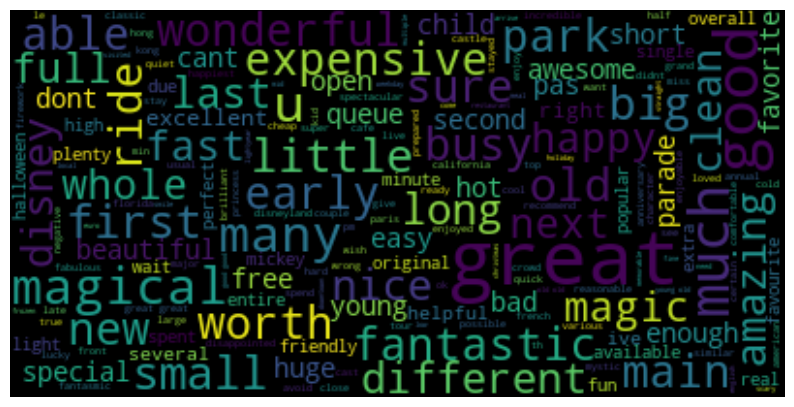

In [27]:
rating_five = disney_df[disney_df['Rating']== 5]
adj_five = ' '.join(rating_five['adjectives'].apply(lambda adjs: ' '.join(adjs)))

plt.figure(figsize=(10,10))
wordcloud_5 = WordCloud(max_font_size = 40, max_words = 1000).generate(adj_five)
plt.axis("off")
plt.imshow(wordcloud_5 , interpolation = 'bilinear')

# Further Analysis

### Polarity Scores 

In [28]:
disney_df['Polarity'] = disney_df['Review_Text'].apply(SentimentIntensityAnalyzer().polarity_scores)

In [30]:
disney_df.head()

,Rating,Reviewer_Location,Review_Text,Branch,year,month,quarter,sentiment,adjectives,Polarity
Review_ID,,,,,,,,,,
670772142,4,Australia,youve ever disneyland anywhere youll find disn...,Disneyland_HongKong,2019,4,2,1,"[youll, similar, main, familiar, small, fabulo...","{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou..."
670682799,4,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong,2019,5,2,1,"[last, stay, n, open, ant, n, waspironman, gre...","{'neg': 0.031, 'neu': 0.68, 'pos': 0.289, 'com..."
670623270,4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,2019,4,2,1,"[hot, big, left, last, methere, interesting, b...","{'neg': 0.023, 'neu': 0.628, 'pos': 0.349, 'co..."
670607911,4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong,2019,4,2,1,"[great, compact, bit, maintenance, present, fa...","{'neg': 0.102, 'neu': 0.628, 'pos': 0.271, 'co..."
670607296,4,United Kingdom,location city took around hour kowlon kid like...,Disneyland_HongKong,2019,4,2,1,"[fine, crowded, hot]","{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp..."
